In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 家電  

## 液晶テレビ

### 時刻別消費電力量
$$
E_{ Elc, TV_{ LED }, d, t } = 
\{
    (
        P_{ Elc, TV_{ LED }, lv, standby } 
        \times 
        t_{ TV_{ LED }, lv, standby, d, t }
        +
        P_{ Elc, TV_{ LED }, lv, view }
        \times 
        t_{ TV_{ LED }, lv, view, d, t }
    )
    +
    (
        P_{ Elc, TV_{ LED }, standby } 
        \times 
        t_{ TV_{ LED }, standby, d, t }
        +
        P_{ Elc, TV_{ LED }, view }
        \times 
        t_{ TV_{ LED }, view, d, t }
    )
\}
\times
10^{ -3 }
$$


$ E_{ Elc, TV_{ LED }, d, t } $：日付dの時刻tにおける消費電力量,kWh  
$ P_{ Elc, TV_{ LED }, lv, standby } $：居間に設置されたテレビの待機時の消費電力,W  
$ t_{ TV_{ LED }, lv, standby, d, t } $：居間に設置されたテレビの日付dの時刻tにおける待機時間,h  
$ P_{ Elc, TV_{ LED }, lv, view } $：居間に設置されたテレビの視聴時の消費電力,W  
$ t_{ TV_{ LED }, lv, view, d, t } $：居間に設置されたテレビの日付dの時刻tにおける視聴時間,h  
$ P_{ Elc, TV_{ LED }, standby } $：居間以外に設置されたテレビの待機時の消費電力,W  
$ t_{ TV_{ LED }, standby, d, t } $：居間以外に設置されたテレビの日付dの時刻tにおける待機時間,h  
$ P_{ Elc, TV_{ LED }, view } $：居間以外に設置されたテレビの視聴時の消費電力,W  
$ t_{ TV_{ LED }, view, d, t } $：居間以外に設置されたテレビの日付dの時刻tにおける視聴時間,h  
$ 10^{ -3 } $：単位換算,Wh -> kWh

In [2]:
def get_E_Elc_tv_led_d_t(P_Elc_tv_led_standby_rtd, P_Elc_tv_led_view_rtd, t_tv_led_lv_standby_d_t, t_tv_led_lv_view_d_t, t_tv_led_standby_d_t, t_tv_led_view_d_t, number_of_people):
    """時刻別消費電力量を計算する
    
    Parameters
    ----------
    P_Elc_tv_led_standby_rtd : float
        定格待機電力, W
        
    P_Elc_tv_led_view_rtd : float
        定格視聴電力, W
        
    t_tv_led_lv_standby_d_t : ndarray(N-dimensional array)
        居間に設置されたテレビの1年間の全時間の待機時間を格納したND配列, h
        d日t時の待機時間が年開始時から8760個連続して格納されている

    t_tv_led_lv_view_d_t : ndarray(N-dimensional array)
        居間に設置されたテレビの1年間の全時間の視聴時間を格納したND配列, h
        d日t時の視聴時間が年開始時から8760個連続して格納されている

    t_tv_led_standby_d_t : ndarray(N-dimensional array)
        居間以外に設置されたテレビの1年間の全時間の待機時間を格納したND配列, h
        d日t時の待機時間が年開始時から8760個連続して格納されている

    t_tv_led_view_d_t : ndarray(N-dimensional array)
        居間以外に設置されたテレビの1年間の全時間の視聴時間を格納したND配列, h
        d日t時の視聴時間が年開始時から8760個連続して格納されている
    
    number_of_people : int
        世帯人数, 人
        
    Returns
    ----------
    E_Elc_tv_led_d_t : ndarray(N-dimensional array)
        1年間の全時間の消費電力量を格納したND配列, Wh
        d日t時の消費電力量が年開始時から8760個連続して格納されている
    """
    
    P_Elc_tv_led_standby = get_P_Elc_tv_led_standby(P_Elc_tv_led_standby_rtd, number_of_people, True)
    P_Elc_tv_led_view = get_P_Elc_tv_led_view(P_Elc_tv_led_view_rtd, number_of_people, True)
    E_Elc_tv_led_lv_d_t = P_Elc_tv_led_standby * t_tv_led_lv_standby_d_t + P_Elc_tv_led_view * t_tv_led_lv_view_d_t
    
    P_Elc_tv_led_standby = get_P_Elc_tv_led_standby(P_Elc_tv_led_standby_rtd, number_of_people, False)
    P_Elc_tv_led_view = get_P_Elc_tv_led_view(P_Elc_tv_led_view_rtd, number_of_people, False)
    E_Elc_tv_led_nlv_d_t = P_Elc_tv_led_standby * t_tv_led_standby_d_t + P_Elc_tv_led_view * t_tv_led_view_d_t
    
    E_Elc_tv_led_d_t = (E_Elc_tv_led_lv_d_t + E_Elc_tv_led_nlv_d_t) * 10**(-3)
    
    return E_Elc_tv_led_d_t

### 動作別の消費電力

#### 待機時の消費電力  
$$
P_{ Elc, TV_{ LED }, standby } =
\begin{cases}
P_{ Elc, TV_{ LED }, standby, rtd }  & ( \mbox{ 4人世帯 } ) \\
P_{ Elc, TV_{ LED }, standby, rtd }  \times \frac{ 3 }{ 3 } & ( \mbox{ 3人世帯 } ) \\
P_{ Elc, TV_{ LED }, standby, rtd }  \times \frac{ 2 }{ 3 } & ( \mbox{ 2人世帯 } ) \\
P_{ Elc, TV_{ LED }, standby, rtd }  \times \frac{ 1 }{ 3 } & ( \mbox{ 1人世帯 } )
\end{cases}
$$

$ P_{ Elc, TV_{ LED }, standby, rtd } $：定格待機電力,W

In [3]:
def get_P_Elc_tv_led_standby(P_Elc_tv_led_standby_rtd, number_of_people, in_a_living_room):
    """待機時の消費電力を計算する
    
    Parameters
    ----------
    P_Elc_tv_led_standby_rtd : float
        定格待機電力, W
        
    number_of_people : int
        世帯人数, 人

    in_a_living_room: Boolean
        設置場所が居間である, 真偽値　True：参照スケジュールは「居間」, False：参照スケジュールは「洋室1」
        
    Returns
    ----------
    P_Elc_tv_led_standby : float
        待機電力, W
    """
    
    if in_a_living_room:
        P_Elc_tv_led_standby = P_Elc_tv_led_standby_rtd
    else:
        P_Elc_tv_led_standby = P_Elc_tv_led_standby_rtd * 0.367 / 0.15
    
    if number_of_people == 4:
        P_Elc_tv_led_standby = P_Elc_tv_led_standby
    elif number_of_people == 3:
        P_Elc_tv_led_standby = P_Elc_tv_led_standby * 3 / 3
    elif number_of_people == 2:
        P_Elc_tv_led_standby = P_Elc_tv_led_standby * 2 / 3
    elif number_of_people == 1:
        P_Elc_tv_led_standby = P_Elc_tv_led_standby * 1 / 3
    else:
        raise ValueError(number_of_people)
        
    return P_Elc_tv_led_standby

#### 視聴時の消費電力  
$$
P_{ Elc, TV_{ LED }, view } =
\begin{cases}
0.8579 \times P_{ Elc, TV_{ LED }, view, rtd }  & ( \mbox{ 4人世帯 } ) \\
0.8579 \times P_{ Elc, TV_{ LED }, view, rtd }  \times \frac{ 3 }{ 3 } & ( \mbox{ 3人世帯 } ) \\
0.8579 \times P_{ Elc, TV_{ LED }, view, rtd }  \times \frac{ 2 }{ 3 } & ( \mbox{ 2人世帯 } ) \\
0.8579 \times P_{ Elc, TV_{ LED }, view, rtd }  \times \frac{ 1 }{ 3 } & ( \mbox{ 1人世帯 } )
\end{cases}
$$

$ P_{ Elc, TV_{ LED }, view, rtd } $：定格視聴電力,W

In [4]:
def get_P_Elc_tv_led_view(P_Elc_tv_led_view_rtd, number_of_people, in_a_living_room):
    """視聴時の消費電力を計算する
    
    Parameters
    ----------
    P_Elc_tv_led_view_rtd : float
        定格視聴電力, W
        
    number_of_people : int
        世帯人数, 人
        
    in_a_living_room: Boolean
        設置場所が居間である, 真偽値　True：参照スケジュールは「居間」, False：参照スケジュールは「洋室1」
        
    Returns
    ----------
    P_Elc_tv_led_view : float
        視聴電力, W
    """

    
    if in_a_living_room:
        P_Elc_tv_led_view = P_Elc_tv_led_view_rtd
    else:
        P_Elc_tv_led_view = P_Elc_tv_led_view_rtd * 63 / 125
    
    if number_of_people == 4:
        P_Elc_tv_led_view = 0.8579 * P_Elc_tv_led_view
    elif number_of_people == 3:
        P_Elc_tv_led_view = 0.8579 * P_Elc_tv_led_view * 3 / 3    
    elif number_of_people == 2:
        P_Elc_tv_led_view = 0.8579 * P_Elc_tv_led_view * 2 / 3
    elif number_of_people == 1:
        P_Elc_tv_led_view = 0.8579 * P_Elc_tv_led_view * 1 / 3
    else:
        raise ValueError(number_of_people)
        
        
        
    return P_Elc_tv_led_view

## サンプル計算

### 家電スケジュールの読み込み
ここでは、サンプルデータをcsvファイルから読み込む

In [5]:
def import_schedule_1_d_t() -> np.ndarray:
    """家電スケジュールを外部CSVファイルからND配列に読み込む
    
    Returns
    ----------
    E_Elc_tv_led_d_t : ndarray(N-dimensional array)
        1年間の全時間の家電スケジュールを格納したND配列
        d日t時の家電スケジュールが年開始時から8760個連続して格納されている
    """
    
    df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
    ds = df['液晶テレビ（居間）_4人世帯_待機']
    schedule_1_d_t = ds.values
    return schedule_1_d_t

In [6]:
def import_schedule_2_d_t() -> np.ndarray:
    """家電スケジュールを外部CSVファイルからND配列に読み込む
    
    Returns
    ----------
    E_Elc_tv_led_d_t : ndarray(N-dimensional array)
        1年間の全時間の家電スケジュールを格納したND配列
        d日t時の家電スケジュールが年開始時から8760個連続して格納されている
    """
    
    df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
    ds = df['液晶テレビ（居間）_4人世帯_視聴']
    schedule_2_d_t = ds.values
    return schedule_2_d_t

In [7]:
def import_schedule_3_d_t() -> np.ndarray:
    """家電スケジュールを外部CSVファイルからND配列に読み込む
    
    Returns
    ----------
    E_Elc_tv_led_d_t : ndarray(N-dimensional array)
        1年間の全時間の家電スケジュールを格納したND配列
        d日t時の家電スケジュールが年開始時から8760個連続して格納されている
    """
    
    df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
    ds = df['液晶テレビ（洋室1）_4人世帯_待機']
    schedule_3_d_t = ds.values
    return schedule_3_d_t

In [8]:
def import_schedule_4_d_t() -> np.ndarray:
    """家電スケジュールを外部CSVファイルからND配列に読み込む
    
    Returns
    ----------
    E_Elc_tv_led_d_t : ndarray(N-dimensional array)
        1年間の全時間の家電スケジュールを格納したND配列
        d日t時の家電スケジュールが年開始時から8760個連続して格納されている
    """
    
    df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
    ds = df['液晶テレビ（洋室1）_4人世帯_視聴']
    schedule_4_d_t = ds.values
    return schedule_4_d_t

#### 視聴時の消費電力

In [9]:
get_P_Elc_tv_led_view(125,4,False)

54.0477

#### 待機時の消費電力

In [10]:
get_P_Elc_tv_led_standby(0.15,4,False)

0.367

### 時刻別消費電力量

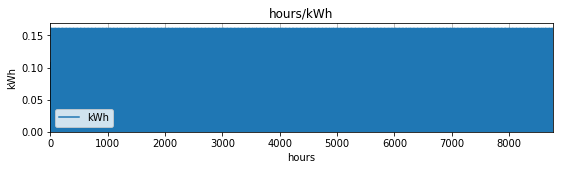

In [11]:
t_tv_led_lv_standby_d_t = import_schedule_1_d_t()
t_tv_led_lv_view_d_t = import_schedule_2_d_t()
t_tv_led_standby_d_t = import_schedule_3_d_t()
t_tv_led_view_d_t = import_schedule_4_d_t()

x = np.arange(8760)
y = get_E_Elc_tv_led_d_t(0.15, 125, t_tv_led_lv_standby_d_t, t_tv_led_lv_view_d_t, t_tv_led_standby_d_t, t_tv_led_view_d_t, 4)

plt.figure(figsize=(9,2))
plt.subplot(1,1,1)
plt.plot(x, y, label="kWh")

plt.grid(True)

plt.title("hours/kWh")
plt.xlabel("hours")
plt.ylabel("kWh")

plt.xlim(0,8760)
plt.ylim(0,)

plt.legend()
plt.show()

### 省エネ基準との比較用時刻別消費電力量の書き出し

In [12]:
n = 1

df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
ds1 = df['液晶テレビ（居間）_' + str(n) + '人世帯_待機']
ds2 = df['液晶テレビ（居間）_' + str(n) + '人世帯_視聴']
ds3 = df['液晶テレビ（洋室1）_' + str(n) + '人世帯_待機']
ds4 = df['液晶テレビ（洋室1）_' + str(n) + '人世帯_視聴']

dat = get_E_Elc_tv_led_d_t(0.15, 125, ds1, ds2, ds3, ds4, n)
np.savetxt('tv' + str(n) +'.csv',dat,delimiter=',',fmt = " %s ")

In [13]:
n = 2

df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
ds1 = df['液晶テレビ（居間）_' + str(n) + '人世帯_待機']
ds2 = df['液晶テレビ（居間）_' + str(n) + '人世帯_視聴']
ds3 = df['液晶テレビ（洋室1）_' + str(n) + '人世帯_待機']
ds4 = df['液晶テレビ（洋室1）_' + str(n) + '人世帯_視聴']

dat = get_E_Elc_tv_led_d_t(0.15, 125, ds1, ds2, ds3, ds4, n)
np.savetxt('tv' + str(n) +'.csv',dat,delimiter=',',fmt = " %s ")

In [14]:
n = 3

df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
ds1 = df['液晶テレビ（居間）_' + str(n) + '人世帯_待機']
ds2 = df['液晶テレビ（居間）_' + str(n) + '人世帯_視聴']
ds3 = df['液晶テレビ（洋室1）_' + str(n) + '人世帯_待機']
ds4 = df['液晶テレビ（洋室1）_' + str(n) + '人世帯_視聴']

dat = get_E_Elc_tv_led_d_t(0.15, 125, ds1, ds2, ds3, ds4, n)
np.savetxt('tv' + str(n) +'.csv',dat,delimiter=',',fmt = " %s ")

In [15]:
n = 4

df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
ds1 = df['液晶テレビ（居間）_' + str(n) + '人世帯_待機']
ds2 = df['液晶テレビ（居間）_' + str(n) + '人世帯_視聴']
ds3 = df['液晶テレビ（洋室1）_' + str(n) + '人世帯_待機']
ds4 = df['液晶テレビ（洋室1）_' + str(n) + '人世帯_視聴']

dat = get_E_Elc_tv_led_d_t(0.15, 125, ds1, ds2, ds3, ds4, n)
np.savetxt('tv' + str(n) +'.csv',dat,delimiter=',',fmt = " %s ")